# --- Non-linear dataset (swiss roll) -----------------------------------------------------------

## Populate swiss-roll dataset

In [1]:
from sklearn import datasets

In [2]:
X, color = datasets.make_swiss_roll(n_samples=5000, noise=0.0)

In [3]:
Y_labels = ['X', 'Y', 'Z']

## Prepare data (feature scaling)

Not needed for LLE

## Apply LLE dimentionality reduction

In [4]:
from sklearn import manifold

In [5]:
from time import time

In [6]:
t0 = time()

# LLE classic
X_projected_lle, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)

t1 = time()
print("LLE Time:", t1-t0)

# LLE modified
X_projected_lle_modified, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2, method='modified')

t2 = time()
print("LLE Modified Time:", t2-t1)

# LLE Hessian
X_projected_lle_hessian, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2, method='hessian')

t3 = time()
print("LLE Hessian Time:", t3-t2)

# LTSA
X_projected_lle_ltsa, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2, method='ltsa')

t4 = time()
print("LTSA Time:", t4-t3)

LLE Time: 0.9820373058319092
LLE Modified Time: 2.0084779262542725
LLE Hessian Time: 2.599290132522583
LTSA Time: 3.171599864959717


In [7]:
err

2.744637033669085e-08

## Plot

# === LLE =====================================================

In [8]:
import matplotlib.pyplot as plt

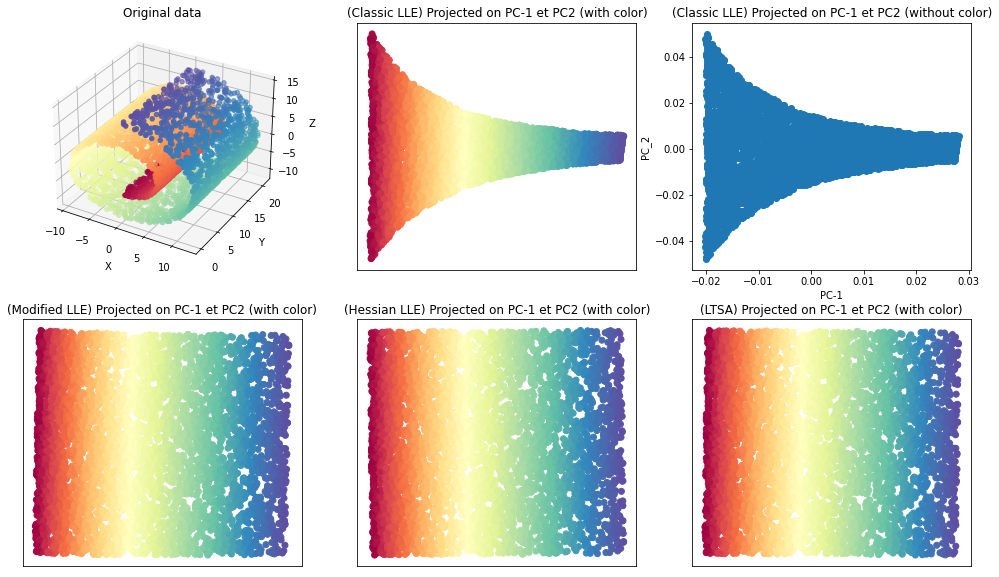

In [9]:
fig = plt.figure(figsize=(17,10))

ax = fig.add_subplot(231, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax = fig.add_subplot(232)
ax.scatter(X_projected_lle[:, 0], X_projected_lle[:, 1], c=color , cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('(Classic LLE) Projected on PC-1 et PC2 (with color)')

ax = fig.add_subplot(233)
ax.scatter(X_projected_lle[:, 0], X_projected_lle[:, 1])
#plt.xticks([]), plt.yticks([])
plt.title('(Classic LLE) Projected on PC-1 et PC2 (without color)')
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")

## Modified

ax = fig.add_subplot(234)
ax.scatter(X_projected_lle_modified[:, 0], X_projected_lle_modified[:, 1], c=color , cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('(Modified LLE) Projected on PC-1 et PC2 (with color)')

## Hessian

ax = fig.add_subplot(235)
ax.scatter(X_projected_lle_hessian[:, 0], X_projected_lle_hessian[:, 1], c=color , cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('(Hessian LLE) Projected on PC-1 et PC2 (with color)')

## LTSA

ax = fig.add_subplot(236)
ax.scatter(X_projected_lle_ltsa[:, 0], X_projected_lle_ltsa[:, 1], c=color , cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('(LTSA) Projected on PC-1 et PC2 (with color)')


plt.show()

# === PCA comparison ===========================================

## Prepare data (feature scaling)

In [10]:
from sklearn import preprocessing

In [11]:
std_scale = preprocessing.StandardScaler().fit(X)

In [12]:
X_scaled = std_scale.transform(X)

## Apply PCA dimentionality reduction

In [13]:
from sklearn import decomposition

In [14]:
pca = decomposition.PCA(n_components=2)

#### Decompose

In [15]:
pca.fit(X_scaled)

PCA(n_components=2)

#### Examine explained variance

...

#### Project

In [16]:
X_projected = pca.transform(X_scaled)
X_projected.shape

(5000, 2)

## Plot

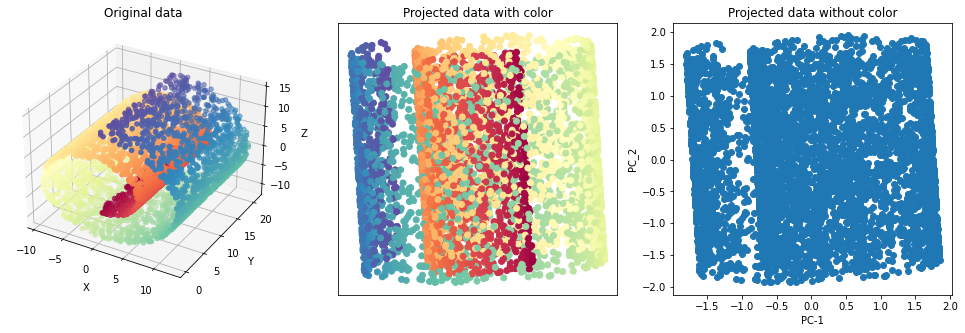

In [17]:
fig = plt.figure(figsize=(17,5))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax = fig.add_subplot(132)
ax.scatter(X_projected[:, 0], X_projected[:, 1], c=color, cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('Projected data with color')

ax = fig.add_subplot(133)
ax.scatter(X_projected[:, 0], X_projected[:, 1])
#plt.xticks([]), plt.yticks([])
plt.title('Projected data without color')
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")

plt.show()

## --- Notes ----------------------------------------------------------------------------------------------------------------

PCA doesn't works well with non-linearly separable datasets... 

LLE successfuly unroll the dataset and make it usable (linearly separable) in 2D.

But LLE's result is even more usable using 'Modified' or 'Hessian' versions.